## Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент гр. 9382 Субботин Максим, вариант 86.



## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

##### Бинарный метод возведения числа в степень
Двоичное возведение в степень - это метод, который позволят возводить любое число в $n$-ю степень за $O(log(n))$.

Для любого числа $a$ и чётного числа $n$ выполняется: $a^n = (a^{n/2})^{n/2} = a^{n/2}*a^{n/2}$.

Если степень $n$ чётна, то переходим к чётной степени $n-1$: $a^n = a^{n-1}*a$.


В итоге от степени $n$ если она чётная переходим к меньшей степени $n/2$, а если нечётная, то к $n-1$, таким образом доходим до базы рекурсии $n = 0$.

Количество операций умножений равно $\lambda(n) + \nu(n) -1$, где $\lambda(n) = \lfloor lb(n) \rfloor$ и $\nu(n)$ - количество единиц в бинарном представлении числа.


##### Метод множителей

Этот метод заключается в следующей идее:

Если мы умеем вычислять $x^i$ за $n$ операций, а $y^j$ за $m$ операций, то $(x^i)^j = x^{i*j}$ можем вычислить за $n+m$ операций. При этом $i$ это наименьший простой множитель степени $k$, в которую хотим возвести число. Если же $k$ изначально простая степень, то считаем $x^{k-1}$ и затем умножаем на $x$.

##### Алгоритм Яо для вычисления приближённых аддитивных цепочек

Аддитивная цепочка длины $l$ - это такая последовательность $l+1$ натуральных чисел, в которой первое число $1$, а последующие получаются путем суммирования любых двух предыдущих.

Выбирается положительное целое число $k$. $n$ записывается в форме $c_{j}*2^{jk} + ... + c_{2}*2^{2k} + c_{1}*2^{k} + c_0$, при этом $c_{j} != 0$. 

d(z) определим как сумму $2^{ik}$ по всем $i$ таким что $c_{i} == z$.

Цепочка Яо начинается с $1,2,4,8,...,2^{\lfloor lg n \rfloor}$, затем для каждого $z \in \{1,2,3,...,2^k-1\}$ считается $d(z)$. Если $d(z)$ ненулевой, то получаем $z*d(z)$ аналогично бинарному алгоритму умножения(только теперь сложение) и записываем промежуточные значения в цепочку. В итоге $n = d(1) + 2*d(2) + 3*d(3) + ... + (2^k - 1)d(2^k-1)$.

Степень $n$ высчитывается за $lg(n) + (1 + o(1))(lg n)/lglg n$ умножений.

##### Алгоритм дробления вектора индексов

Звёздная аддитивная цепочка - цепочка, элементы в которой стрятся по следующему правилу: $a_i = a_{i-1} + a_j$, где $1\leqslant j \leqslant i$.

Вектор индексов - это последовательность натуральных чисел. Для вектора длины $m-1$ можно построить звёздную аддитивную цепочку длины $m$. Каждый элемент в векторе индексов - это индекс $j$ элемента, который нужно прибавить к $a_{i-1}$ чтобы получить $(i+1)$-й элемент в звёздной цепочке.

Алгоритм дробления вектора индексов нужен для нахождения для заданного числа $n$ звёздную аддитивную цепочку минимальной длины. 

Начинаем рассматривать аддитивные цепочки с длиной $m$, где $\underline{l}(n) \leqslant m \leqslant \bar{l}(n)$, при этом $\underline{l}(n) = \lfloor lb(n) \rfloor$ и $\bar{l}(n) = \lambda(n) + \nu(n) - 1$.

Выбираем $q: 1 \leqslant q \leqslant m - 1$. Пусть $q$ будет $m/2$. Затем перебираем все векторы индексов длины $q$, которые будут отвечать за первые элементы в аддитивной цепочке. Каждый такой вектор(назовем его vec_1) дополняем до вектора длины $m$ двумя способами.

Первый способ: чтобы получить минимальное значение в последнем элементе аддитивной цепочки при таком vec_1. Т.е. мы должны добавить к vec_1 вектор длины $m-q$ в котором все элементы будут равны 1.

Второй способ: чтобы получить максимальное значение в последнем элементе аддитивной цепочки при таком vec_1. Для этого мы должны добавить к vec_1 вектор длины $m-q$ в котором все элементы будут равны своим индексам(если учесть, что нумерация индексов начинается с 1).

С помощью этих векторов мы строим аддитивные цепочки и получаем два значения $a_{max}$ и $a_{min}$. 

Если одно из этих чисел равно $n$, то алгоритм можно заканчивать.

Если $n \in [a_{min},a_{max}]$ то начинаем перебирать вектора длины $m-q$, которые можно прибавить vec_1, чтобы по этому вектору можно было построить аддитивную цепочку, последний элемент которой равнялся бы $n$.



##### Теорема Брауэра и следствие 1
Теорема. При некотором $k < lb(lb(n))$ справедливо $l(n) < (1 + k^{-1})\lceil lb n \rceil + 2^{k-1} - k + 2$.

Следствие 1. Если $k = \lambda(\lambda(n)) - 2*\lambda(\lambda(\lambda(n)))$, то $\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$




##### Гипотеза Шольца-Брауэра
$l^{*}(2^n - 1) \leqslant l^{*}(n) + n - 1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geqslant 30$, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5. Проверить гипотезу Шольца–Брауэра для $1 < n\leqslant 10$ на алгоритме дробления вектора индексов. Сделать выводы.

6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы


#### 1.Бинарный метод и метод множителей
Реализация двух методов представлена ниже:

In [295]:
def binpow(x, n):
    res = 1
    op = -1
    while n:
        if n & 1:
            res = res * x
            op = op + 1
            n = n - 1
        else:
            x = x * x
            op = op + 1
            n = n >> 1 
    return [res,op]

In [364]:
def mm(x, n):
    F = factor(n)
    if F[0][0] == n:
        res = binpow(x, n-1)
        res[0] = res[0] * x
        res[1] = res[1] + 1
        return res
    a = binpow(x, F[0][0])
    b = binpow(a[0], n // F[0][0])
    return [b[0], a[1] + b[1]]

Бинарный метод и метод множителей для числа 1:


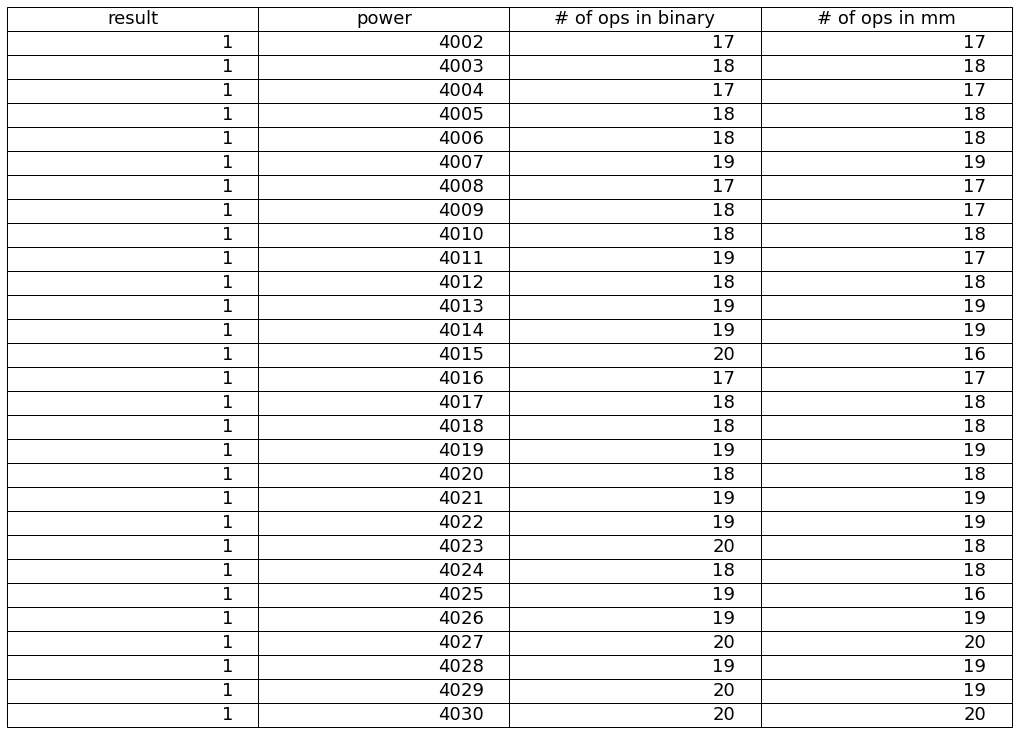

In [369]:
bin_res = []
for j in range(1,30,1):
    binr = binpow(1, 4001 + j)
    mmr = mm(1, 4001 + j)
    row = [binr[0], 4001+j, binr[1], mmr[1]]
    bin_res.append(row)
    
column_headers = ['result', 'power', '# of ops in binary', "# of ops in mm"]

cell_text = []
for row in bin_res:
    cell_text.append([x for x in row])

table = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table.set_fontsize(18)
table.scale(3, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Бинарный метод и метод множителей для числа 1:')
plt.draw()

#### Вывод
Как видно, метод множителей лишь иногда и незначительно лучше бинарного метода.

#### 2. Алгоритм Яо
Ниже реализация этого алгоритма:

In [400]:
def mult(d, z):
    seq = []
    seq.append(d)
    while seq[len(seq)-1] != z*d:
        check = false
        i = 1
        while(check != true):
            if seq[len(seq)-i] + seq[len(seq)-1] <= z*d:
                seq.append(seq[len(seq)-i] + seq[len(seq)-1])
                check = true
            else:
                i = i + 1
    return seq

def yao(n, k):
    seq = []
    i = 1
    while i < n:
        seq.append(i)
        i = i << 1
    
    digits = n.digits(1 << k)
    
    j = 1
    last_d = []
    while j <= ((1 << k) - 1):
        d = 0
        for idx in range(len(digits)):
            if digits[idx] == j:
                d = d + (1 << k*idx)
        if d != 0:
            seq = seq + mult(d, j)
            last_d.append(seq[len(seq)-1])
        j = j + 1
    seq.append(sum(last_d))
    
    return seq  

Минимальная длина аддитивных цепочек для чисел n:


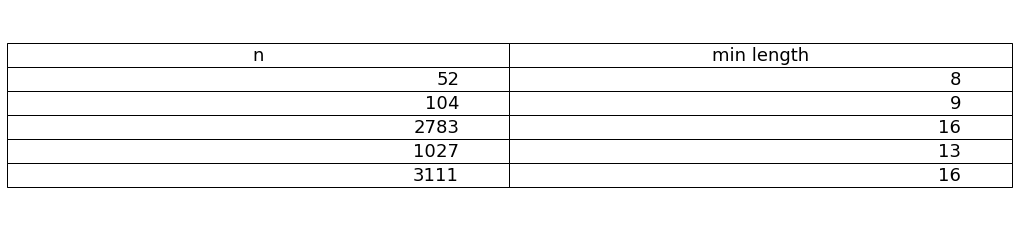

In [417]:
min_chains_data = [[52, 8],[104,9],[2783,16],[1027, 13], [3111,16]]
    
column_headers = ['n', 'min length']

cell_text = []
for row in min_chains_data:
    cell_text.append([x for x in row])

table = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table.set_fontsize(18)
table.scale(3, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Минимальная длина аддитивных цепочек для чисел n:')
plt.draw()

Алгоритм Яо: 


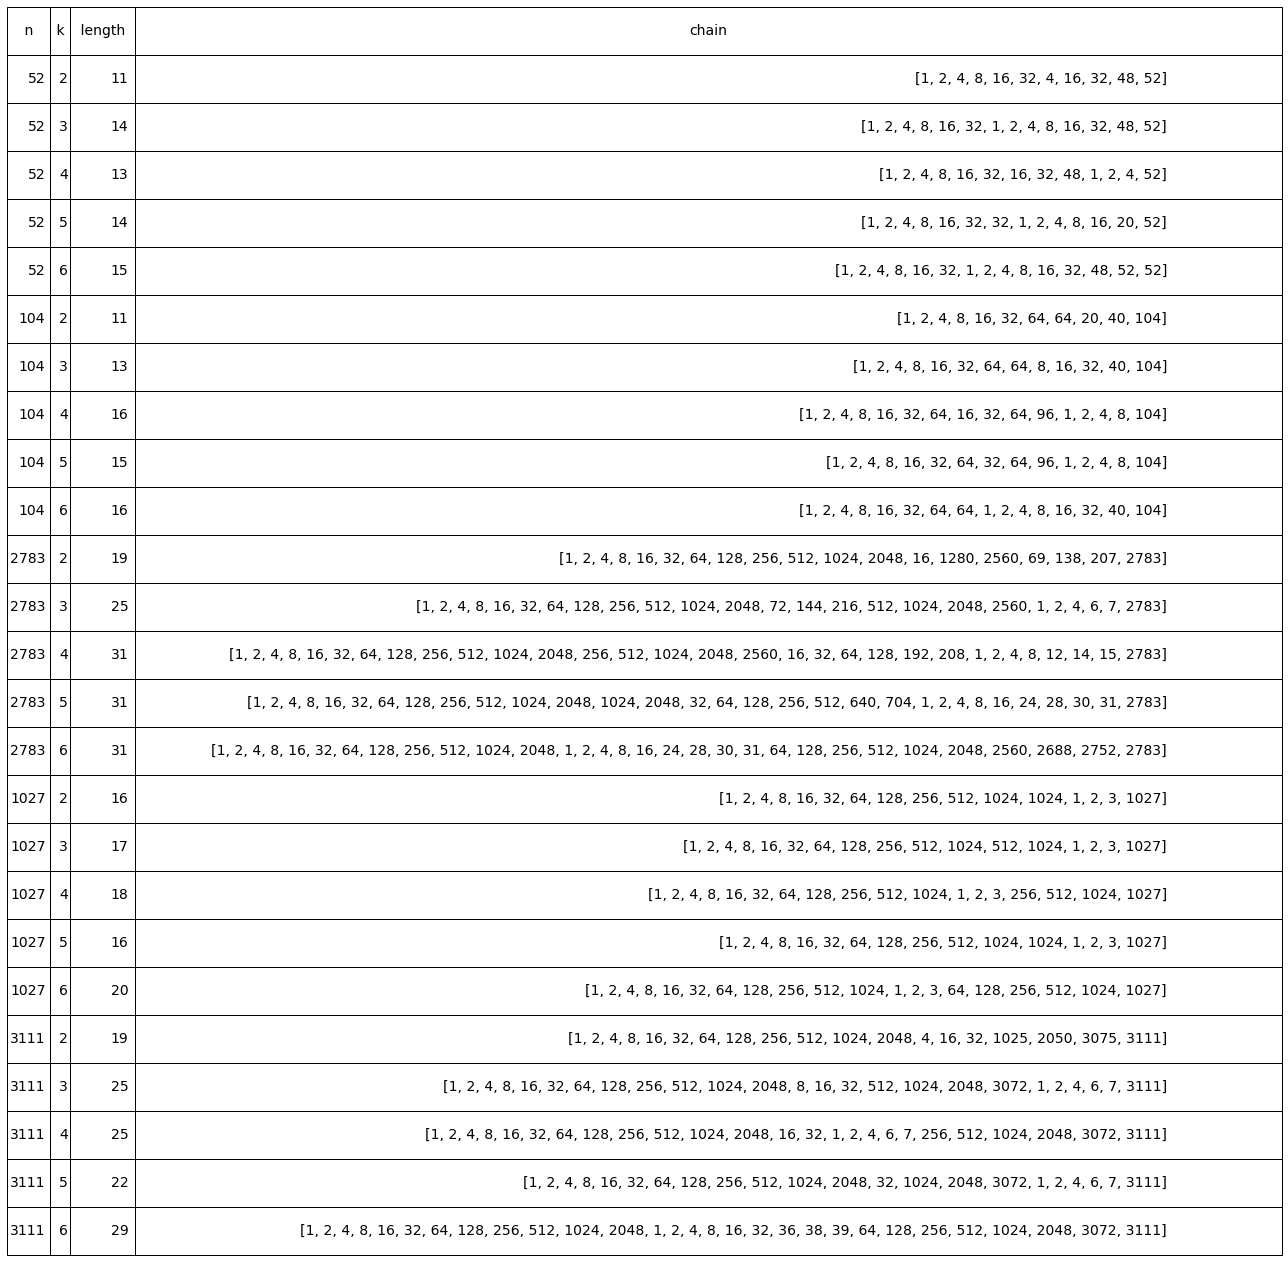

In [491]:
yao_res = []
for yao_pair in min_chains_data:
    yao_numb = yao_pair[0]
    for j in range(2,7):
        yao_r = yao(yao_numb, j)
        row = [yao_numb, j, len(yao_r), yao_r]
        yao_res.append(row)
    
column_headers = [' n ',' k ', ' length ', 'chain']

cell_text = []
for row in yao_res:
    cell_text.append([x for x in row])

table_yao = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table_yao.auto_set_font_size(False)
table_yao.auto_set_column_width(col=list(range(4)))
table_yao.set_fontsize(14)
table_yao.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Алгоритм Яо: ')
plt.draw()

#### Вывод
Ни для одного из чисел 52, 104, 2783, 1027, 3111 алгоритм Яо не выдал цепочку минимальной длины при варьировании параметра $k$. Также было замечено, что при увеличении параметра $k$ длина цепочки имеет возрастающий характер.

#### Алгоритм дробления векторов

In [485]:
import time
def l_low(n):
    return lambda_f(n)

def lambda_f(n):
    return floor(log(n,2).n())

def nu_f(n):
    res = to_digits(n,2)
    return res.count(1)

def l_high(n):
    return lambda_f(n) + nu_f(n) - 1

    

def change(idx_vec, q = 0):
    for i, el in reversed(list(enumerate(idx_vec))):
        if el != 1:
            el = el - 1
            idx_vec[i] = el
            for j in range(i+1,len(idx_vec)):
                idx_vec[j] = j + 1 + q
            return idx_vec
    return idx_vec

def is_vec_ones(idx_vec):
    for el in idx_vec:
        if el != 1:
            return false
    return true
            
def star_chain(idx_vec):
    chain = [1]
    for el in idx_vec:
        chain.append(chain[len(chain)-1] + chain[el-1])
    return chain
    
    

def vectors_split_algo(n):
    start_time = time.time()
    l_l = l_low(n)
    l_h = l_high(n)
    #print("l_l: ", l_l, " l_h: ", l_h)
    res = []
    for m in range(l_l, l_h+1):
        q = 0
        if m > 3:
            q = m // 2
        else:
            q = m
        idx_vec = [i for i in range(1, q+1)]
        #print(idx_vec)
        while(is_vec_ones(idx_vec) != true):
            length = m - q
            
            
            #finding a_min and a_max
            add_ones = [1 for j in range(1, length + 1)]
            add_max = [j + q for j in range(1, length + 1)]
            max_vec = idx_vec + add_max
            min_vec = idx_vec + add_ones
            max_chain = star_chain(max_vec)
            min_chain = star_chain(min_vec)
            a_max = max_chain[len(max_chain) - 1]
            a_min = min_chain[len(min_chain) - 1]
            
            # a_m == n -> done!
            if a_max == n:
                return (max_chain, time.time() - start_time)
            if a_min == n:
                return (min_chain, time.time() - start_time)
            
            
            #if n in [a_min,a_max]
            if (n > a_min) and (n < a_max):
              #  print('n in [',a_min,',',a_max,']: max_chain: ', max_chain, ' idx_vec: ', idx_vec + add_max)
                
                
                while(is_vec_ones(add_max) != true):
                    add_max = change(add_max, q)
                    chain = star_chain(idx_vec + add_max)
                   # print('idx_vec: ', idx_vec + add_max)
                   # print('chain: ', chain)
                    if(chain[len(chain) - 1] == n):
                        return (chain, time.time() - start_time)
                
            idx_vec = change(idx_vec)
        res = idx_vec
  
    return (star_chain(res), time.time() - start_time) 

In [488]:
vector_numbers = [501, 505, 631, 727]
res_chains_vec = []
for item in vector_numbers:
    res_chains_vec.append(vectors_split_algo(item))
print(res_chains_vec)

[([1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501], 387.21739196777344), ([1, 2, 4, 8, 16, 32, 64, 128, 160, 168, 336, 504, 505], 385.5685250759125), ([1, 2, 4, 8, 16, 32, 48, 49, 97, 194, 388, 582, 631], 335.8577570915222), ([1, 2, 4, 8, 16, 32, 64, 128, 144, 146, 290, 580, 726, 727], 15811.283931016922)]


Сравнение алгоритма Яо с методом дробления векторов:

Сравнение метода дробления векторов и алгоритм Яо: 


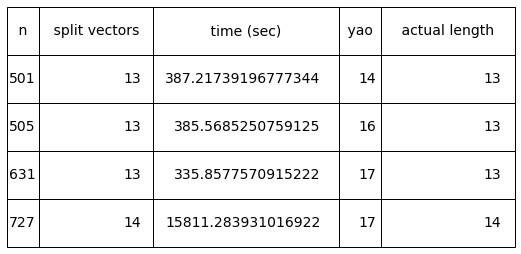

In [497]:
vec_res = []
actual_vec_lengths = [13, 13, 13, 14]
for j in range(0,4):
    yao_numb = yao_pair[0]
    yao_r = yao(vector_numbers[j], 2)
    row = [vector_numbers[j], len(res_chains_vec[j][0]), res_chains_vec[j][1] , len(yao_r), actual_vec_lengths[j]]
    vec_res.append(row)
    
column_headers = [' n ',' split vectors ',' time (sec) ', ' yao ', ' actual length ']

cell_text = []
for row in vec_res:
    cell_text.append([x for x in row])

table_yao = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table_yao.auto_set_font_size(False)
table_yao.auto_set_column_width(col=list(range(4)))
table_yao.set_fontsize(14)
table_yao.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Сравнение метода дробления векторов и алгоритм Яо: ')
plt.draw()

##### Вывод
Алгоритм Яо применялся при $k=2$ т.к. в основном при этом значении $k$ получается меньшая цепочка, или же она очень близка к меньшей. Видно, что алгоритм дробления векторов действительно получает минимальную цепочку. Но этот алгоритм довольно ресурсозатратный. При изменении длины цепочки на 1, время увеличивается в 50 раз и достигает примерно 4.5 часов для подсчёта минимальной цепочки длины 14. 

#### Проверка следствия 1 теоремы Брауэра

In [263]:
def check_Brau():
    ls = []
    for i in range(1,201):
        res, t = vectors_split_algo(i)
        ls.append(len(res))

    return  ls

result_Brau = check_Brau()    

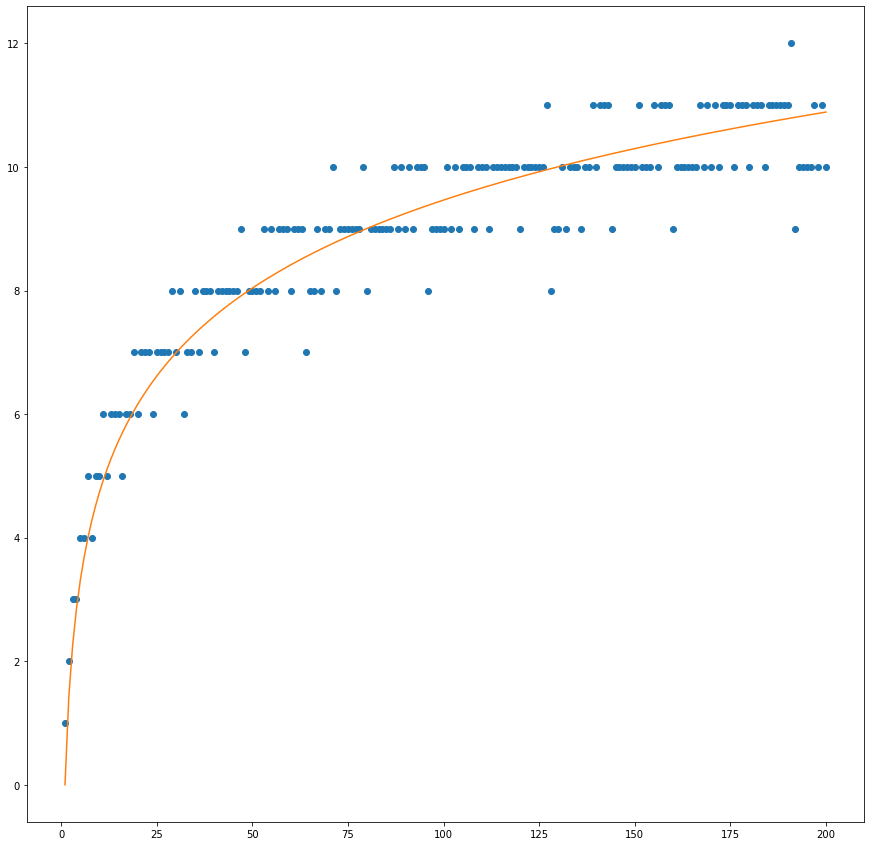

In [277]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

def model(t, coeffs):
    return np.log(t)*coeffs[0]

def residuals(coeffs, y, t):
    return  y - model(t, coeffs)


def plot_some():
    figure, axes = plt.subplots(figsize = (15,15))
    x, y = [i for i in range(1,201)], result_Brau
    t = np.arange(1, 201)
    res = np.array(result_Brau)
    p, flag = leastsq(residuals, 1, args=(res, t))
    plt.plot(t, res, 'o',  t, model(t, p))

    
plot_some()

#### Вывод
График очень сильно напоминает график логарифма. Эта аппроксимация подтверждает теорему Брауэра. С увеличением $n$ ввиду логарифмического роста длина $l(n)$ будет не так сильно увеличиваться. Поэтому $l(n)$ и $\lambda(n)$ будут эквивалентны на бесконечности. 

### Гипотеза Шольца-Брауэра

In [508]:
def Shcoltz():#shcoltz
    #l*(2^n-1) <=l*(n) + n - 1
    l_2s = []
    l_ns = []
    for i in range(2,11):
        first = vectors_split_algo((1 << i) - 1)
        second = vectors_split_algo(i)
        l_2s.append(len(first[0]))
        l_ns.append(len(second[0]) + i - 1)
    return [l_2s, l_ns]
    
results = Shcoltz()
    

Проверка гипотезы Шольца-Брауэра: 


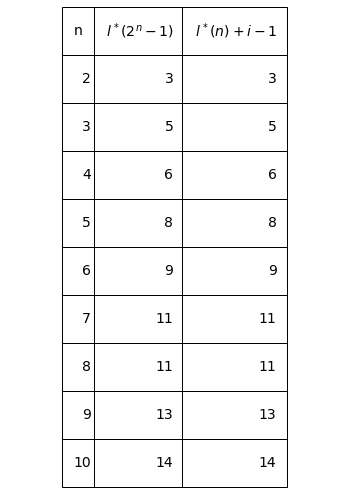

In [513]:
vec_res = []
for j in range(2,11):
    row = [j, results[0][j-2], results[1][j-2]]
    vec_res.append(row)
    
column_headers = ['  n  ',' $l^*(2^n-1)$ ',' $l^*(n) + i - 1$ ']

cell_text = []
for row in vec_res:
    cell_text.append([x for x in row])

table_yao = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table_yao.auto_set_font_size(False)
table_yao.auto_set_column_width(col=list(range(4)))
table_yao.set_fontsize(14)
table_yao.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Проверка гипотезы Шольца-Брауэра: ')
plt.draw()

#### Вывод
Действительно, гипотеза верна для чисел $n\leqslant10$. Этой гипотезой имеет смысл пользоваться, если быть уверенным, что расхождение между этими двумя величинами будет невелико, потому что считать минимальную цепочку для чисел $2^{10}$ намного дольше чем для $10$.

### Улучшения


##### Улучшенный бинарный алгоритм

Возведение $x$ в квадрат осуществляется всегда, вне зависимости от чётности/нечётности текущего n.

In [517]:
def binpow_improved(x, n):
    res = 1
    op = -1
    while n:
        if n & 1:
            res = res * x
            op = op + 1
        x = x * x
        op = op + 1
        n = n >> 1 
    return [res,op]

##### Улучшенный метод множителей
Можно попробовать разделять степень более чем на два числа, таким разбивом на меньшие подзадачи в теории должно получаться меньше вычислений. Также будем иметь в виду, что числа меньшие 14 лучше считаются бинарным методом.

In [552]:
def mm_improved(x, n):
    F = factor(n)
    if F[0][0] == n:
        res = binpow_improved(x, n-1)
        res[0] = res[0] * x
        res[1] = res[1] + 1
        return res
    factors = [item for item in F[0]]
    op_counter = 0
    cur_x = x
    for fac in factors:
        if fac < 14:
            bin_res = binpow_improved(x, fac)
            op_counter = op_counter + bin_res[1]
            cur_x = bin_res[0]
        else:
            mm_res = mm_improved(x, fac)
            mm_res[0] = mm_res[0]*cur_x
            op_counter = op_counter + mm_res[1] + 1
            cur_x = mm_res[0]
    return [x, op_counter]

Улучшенные Бинарный метод и метод множителей для числа 3:


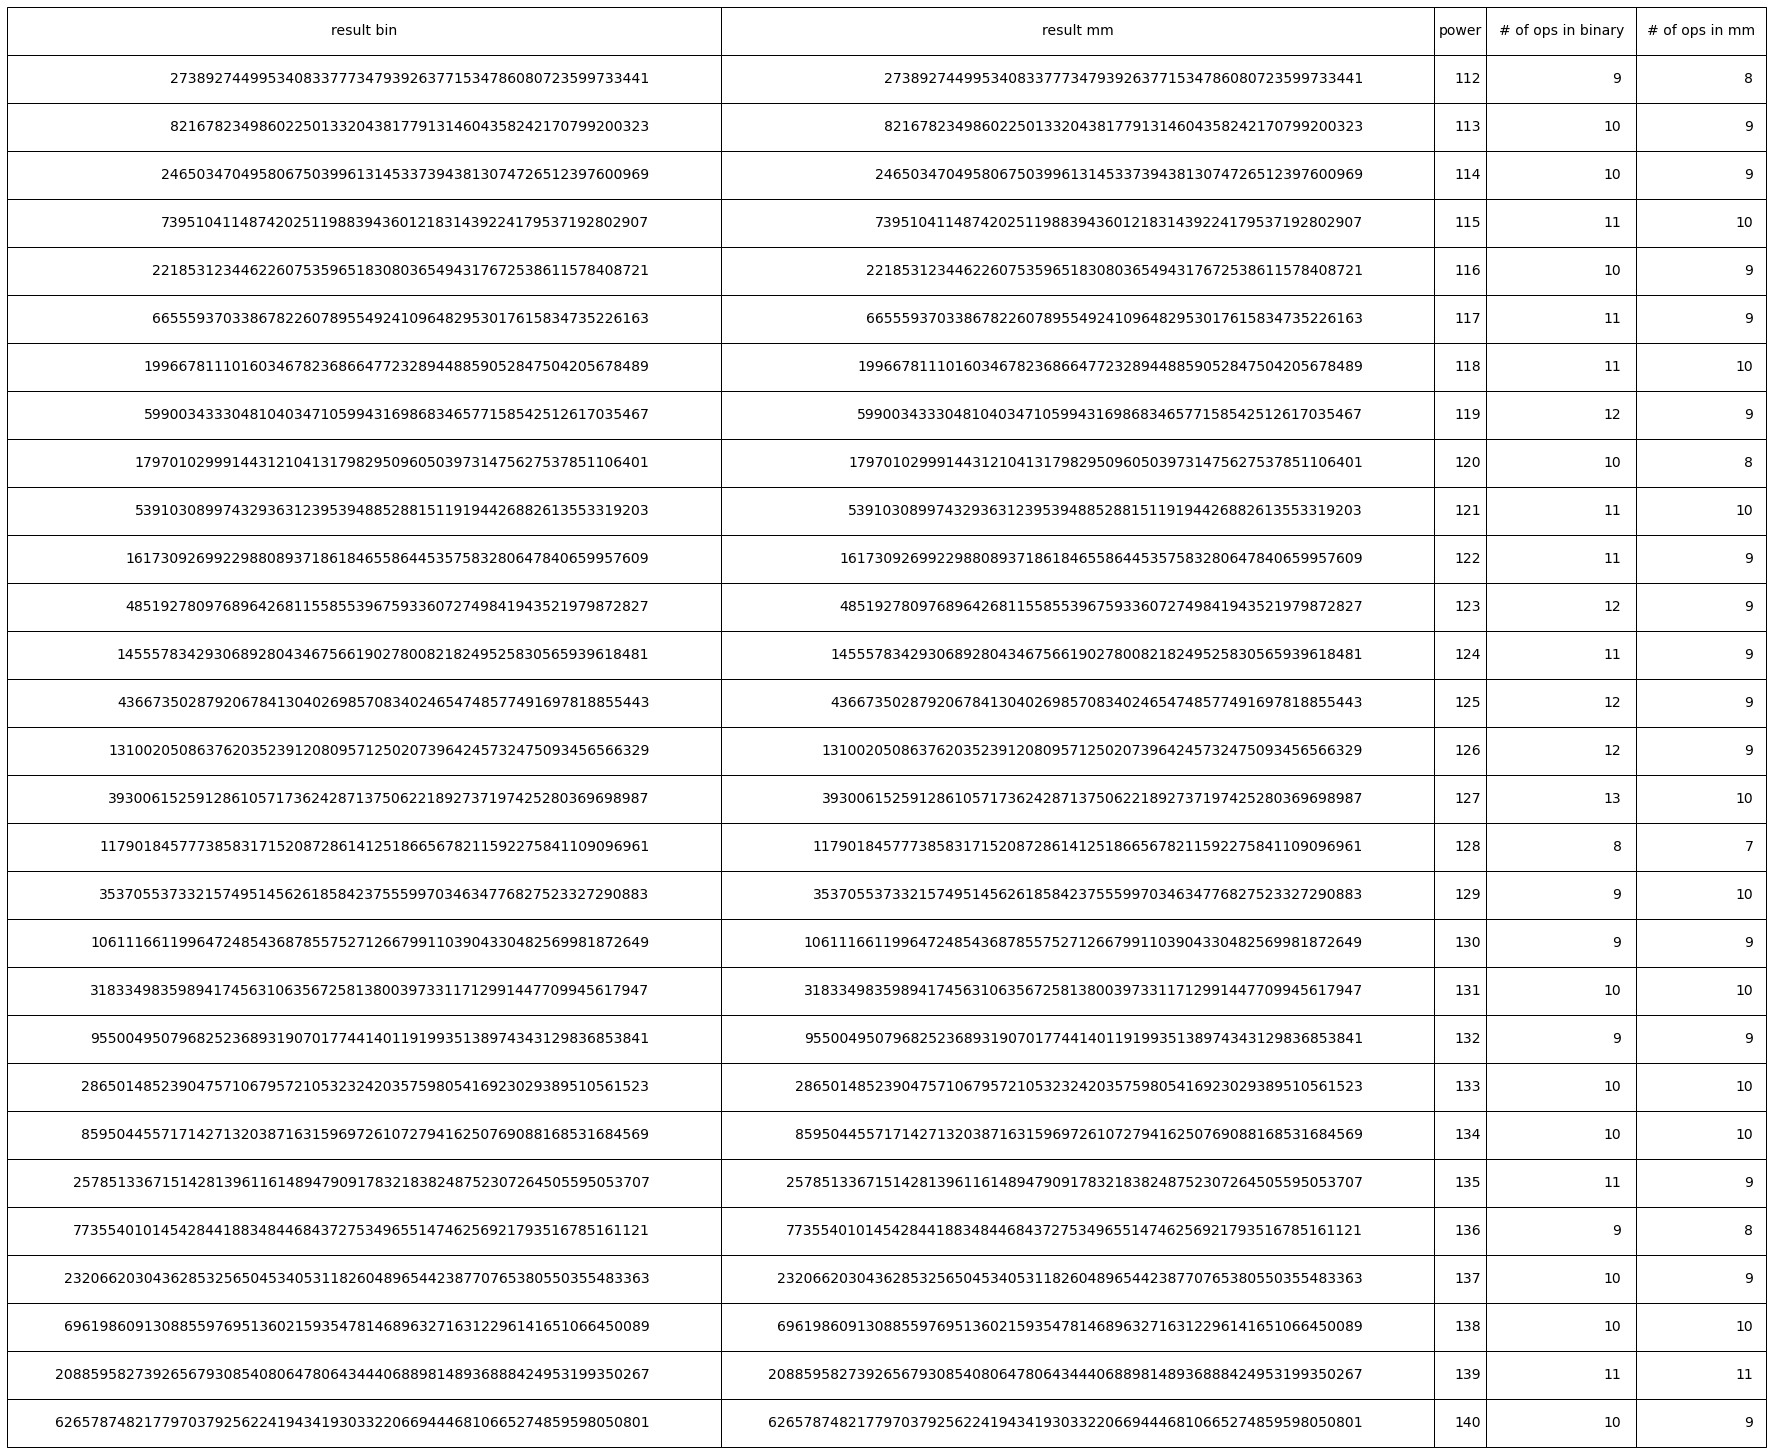

In [555]:
bin_res = []
for j in range(1,30,1):
    binr = binpow_improved(3, 111 + j)
    mmr = multiplier_method(3, 111 + j)
    row = [binr[0],mmr[0], 111 + j, binr[1], mmr[1]]
    bin_res.append(row)
    
column_headers = ['result bin','result mm', 'power', '# of ops in binary', "# of ops in mm"]

cell_text = []
for row in bin_res:
    cell_text.append([x for x in row])

table = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(5)))
table.set_fontsize(14)
table.scale(4, 4) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Улучшенные Бинарный метод и метод множителей для числа 3:')
plt.draw()

Теперь метод множителей стал заметнее лучше бинарного метода.

Проверим на степенях побольше:

Улучшенные Бинарный метод и метод множителей для числа 1:


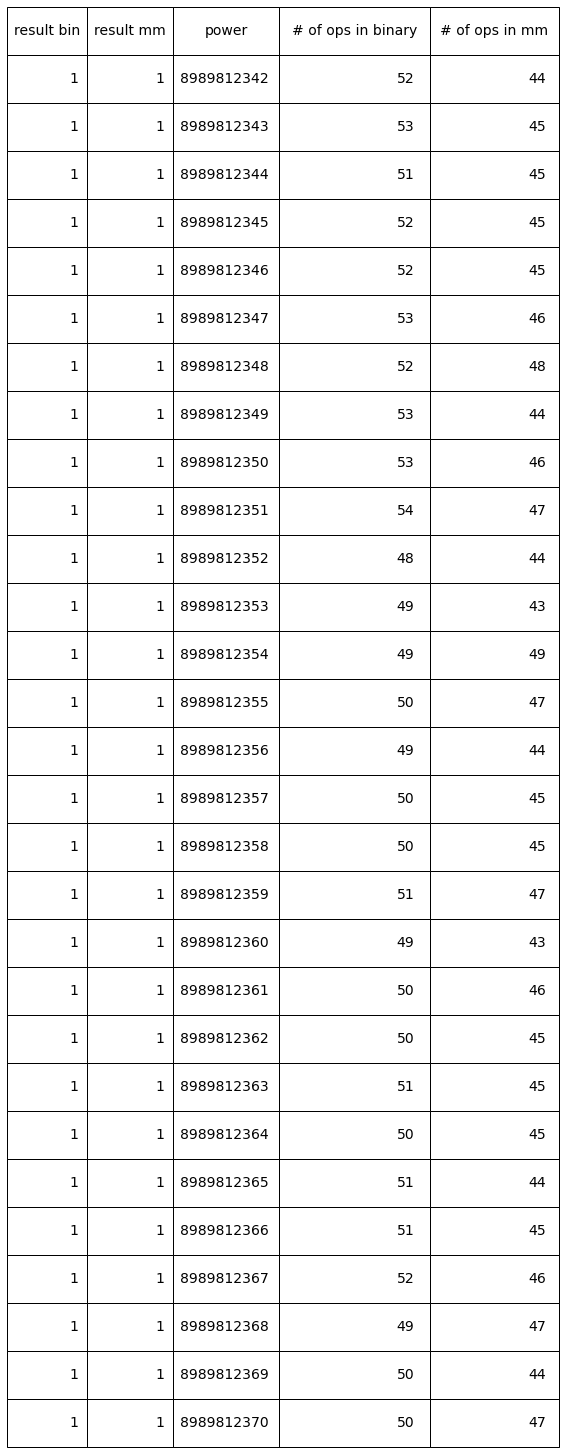

In [560]:
bin_res = []
for j in range(1,30,1):
    binr = binpow_improved(1, 8989812341 + j)
    mmr = multiplier_method(1, 8989812341 + j)
    row = [binr[0],mmr[0], 8989812341 + j, binr[1], mmr[1]]
    bin_res.append(row)
    
column_headers = ['result bin','result mm', 'power', '# of ops in binary', "# of ops in mm"]

cell_text = []
for row in bin_res:
    cell_text.append([x for x in row])

table = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(5)))
table.set_fontsize(14)
table.scale(4, 4) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Улучшенные Бинарный метод и метод множителей для числа 1:')
plt.draw()

Здесь отрыв еще более заметен.

#### Улучшенный алгоритм Яо

Алгоритм Яо можно довольно просто улучшить путем не добавления повторяющихся элементов в цепь. При подсчёте $d(z)$ могут получаться элементы, которые уже есть в цепочки, их можно не вставлять снова.

In [514]:
def yao_improved(n, k):
    seq = []
    i = 1
    while i < n:
        seq.append(i)
        i = i << 1
    
    digits = n.digits(1 << k)
    
    j = 1
    last_d = []
    while j <= ((1 << k) - 1):
        d = 0
        for idx in range(len(digits)):
            if digits[idx] == j:
                d = d + (1 << k*idx)
        if d != 0:
            d_res = mult(d, j)
            for item in d_res:
                if seq.count(item) == 0:
                    seq.append(item)
            last_d.append(seq[len(seq)-1])
        j = j + 1
    if seq.count(sum(last_d)) == 0:
        seq.append(sum(last_d))
    return seq

Тогда для улучшенного алгоритма результаты будут такими:

Алгоритм Яо: 


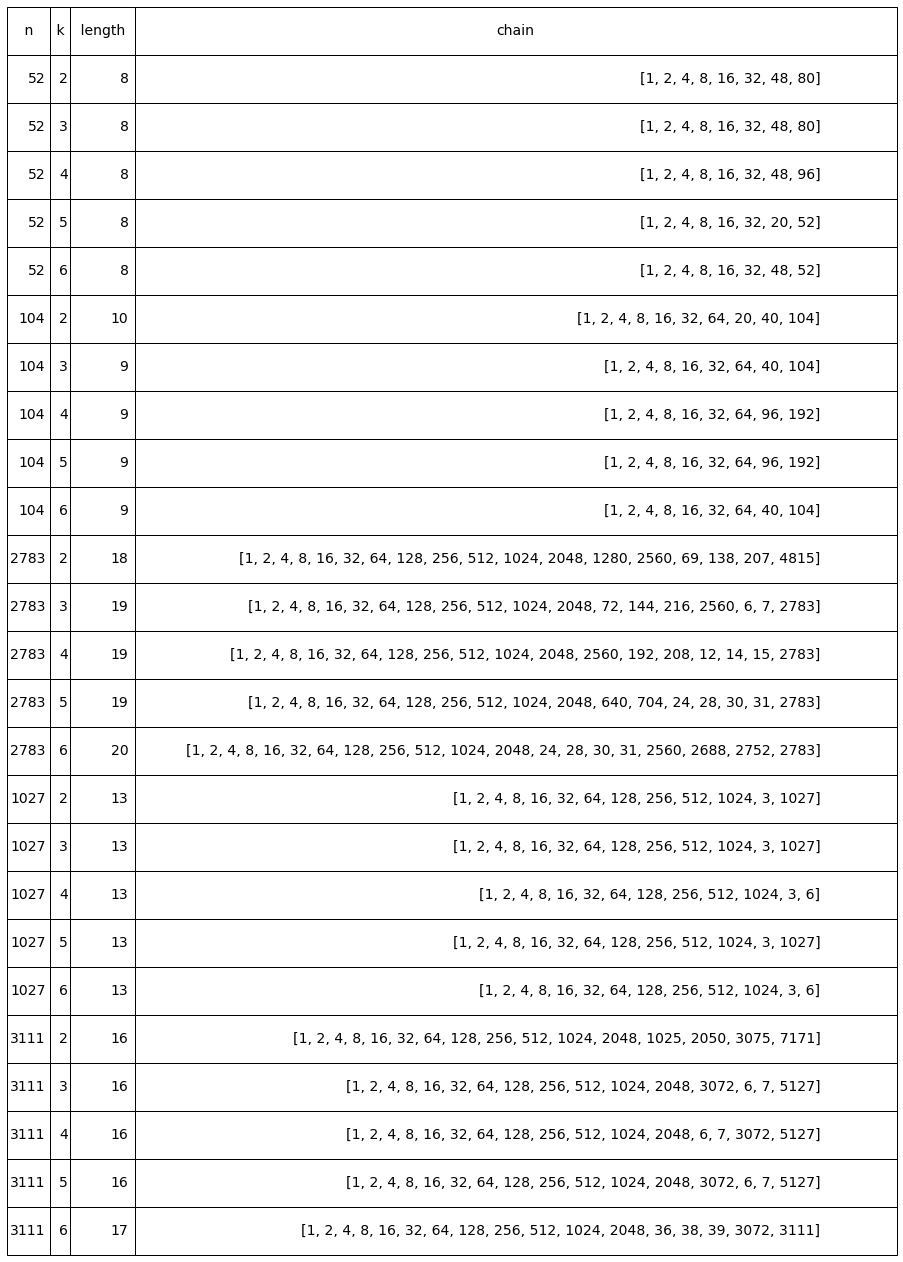

In [516]:
yao_res = []
for yao_pair in min_chains_data:
    yao_numb = yao_pair[0]
    for j in range(2,7):
        yao_r = yao_improved(yao_numb, j)
        row = [yao_numb, j, len(yao_r), yao_r]
        yao_res.append(row)
    
column_headers = [' n ',' k ', ' length ', 'chain']

cell_text = []
for row in yao_res:
    cell_text.append([x for x in row])

table_yao = plt.table(cellText=cell_text,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

table_yao.auto_set_font_size(False)
table_yao.auto_set_column_width(col=list(range(4)))
table_yao.set_fontsize(14)
table_yao.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Алгоритм Яо: ')
plt.draw()

Теперь повторяющихся элементов в цепочках нет и для чисел 52, 104, 1027 и 3111 алгоритм находит минимальную цепочку.

#### Выводы
Были рассмотрены: бинарный метод, метод множителей, алгоритм Яо, метод дробления векторов, первое следствие теоремы Брауэра и гипотеза Шольца-Брауэра.

Бинарный метод легко имплементируемый, но при больших степенях будет показывать результат хуже чем метод множителей, который правда и чуть сложнее в реализации. 

Алгоритм Яо приемлемо подгоняет длину аддитивной цепочки к минимальной и требует не так много вычислительных мощностей, в отличии от более правильного алгоритма дробления векторов, который показывает точную минимальную длину цепочки, но требует огромных ресурсов. 

Следствие 1 теоремы Брауэра было проверено и оно действительно верно.

Также была проверена гипотеза Шольца-Брауэра для чисел $n\leqslant10$. Если не слишком сильно важна точность, то можно воспользоваться этой гипотезой, чтобы не вычислять числа порядка $2^{10}$ схожим методом с алгоритмом дробления векторов.

